In [1]:
!pip install imutils

  Preparing metadata (setup.py) ... done
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25834 sha256=168dca815c2ac46925e400bad28cfc62c1a953e32e45dbd199766be8f862d80b
  Stored in directory: /root/.cache/pip/wheels/85/cf/3a/e265e975a1e7c7e54eb3692d6aa4e2e7d6a3945d29da46f2d7
Successfully built imutils


In [2]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2
import matplotlib.pyplot as plt
import imutils
import random
import seaborn as sns
#np_utils not supporting
from tensorflow.keras.utils import to_categorical  # Replace np_utils.to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam  # Example optimizer import
from tensorflow.keras import backend as K


from keras.layers import Dense,Activation,Flatten,MaxPooling2D, Dropout, Conv2D, BatchNormalization
from tqdm import tqdm



2024-06-25 07:05:20.002077: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-25 07:05:20.002174: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-25 07:05:20.152112: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
dir = "/kaggle/input/handwritten-characters/Train/"
Train_Data=[]
image_size = 32
non_char=["#","&","$","@"]
for i in tqdm(os.listdir(dir)):
    if i in non_char:
        continue
    
    c=0
    sub_dir = os.path.join(dir,i)
    for j in os.listdir(sub_dir):
        c+=1
        if c>1500:
            break
        
        img=cv2.imread(os.path.join(sub_dir,j),0)
        img=cv2.resize(img,(image_size,image_size))
        Train_Data.append([img,i])
        

100%|██████████| 39/39 [04:41<00:00,  7.22s/it]


In [4]:
dir = "/kaggle/input/handwritten-characters/Validation/"
val_data=[]
image_size = 32
non_char=["#","&","$","@"]
for i in tqdm(os.listdir(dir)):
    if i in non_char:
        continue
    
    c=0
    sub_dir = os.path.join(dir,i)
    for j in os.listdir(sub_dir):
        c+=1
        if c>1500:
            break
        
        img=cv2.imread(os.path.join(sub_dir,j),0)
        img=cv2.resize(img,(image_size,image_size))
        val_data.append([img,i])
        

100%|██████████| 39/39 [01:50<00:00,  2.84s/it]



In [5]:
len(Train_Data), len(val_data)

(52500, 17835)

In [6]:
random.shuffle(Train_Data)
random.shuffle(val_data)

In [7]:
TrainX = []
TrainY = []
for feature,label in Train_Data:
    TrainX.append(feature)
    TrainY.append(label)


In [8]:
len(TrainX),len(TrainY)

(52500, 52500)

In [9]:
valX = []
valY = []
for feature,label in val_data:
    valX.append(feature)
    valY.append(label)


In [10]:
len(valX),len(valY)

(17835, 17835)

In [11]:
from sklearn.preprocessing import LabelBinarizer


In [12]:
LB = LabelBinarizer() # normalization
TrainY = LB.fit_transform(TrainY)
valY = LB.fit_transform(valY)

In [13]:
TrainX = np.array(TrainX)/255.0
TrainX = TrainX.reshape(-1,32,32,1)
TrainY = np.array(TrainY)
len(TrainX) , len(TrainY)

(52500, 52500)

In [14]:
valX = np.array(valX)/255.0
valX = valX.reshape(-1,32,32,1)
valY = np.array(valY)


In [15]:
print(TrainX.shape)
print(TrainY.shape)
print(valX.shape)
print(valY.shape)

(52500, 32, 32, 1)
(52500, 35)
(17835, 32, 32, 1)
(17835, 35)


In [16]:
model = Sequential()
model.add(Conv2D(32,(3,3),padding="same",activation='relu',input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35,activation='softmax'))

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 5, 5, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 35)             │         4,515 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,851 (636.14 KB)

 Trainable params: 162,851 (636.14 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

In [19]:
history=model.fit(TrainX,TrainY,epochs=20,batch_size=32,validation_data=(valX,valY),verbose=1)

Epoch 1/20
  52/1641 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0454 - loss: 3.5330

I0000 00:00:1719299532.918630     129 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1641/1641 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.5543 - loss: 1.5198 - val_accuracy: 0.8681 - val_loss: 0.4231
Epoch 2/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8410 - loss: 0.4768 - val_accuracy: 0.8830 - val_loss: 0.3643
Epoch 3/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8705 - loss: 0.3881 - val_accuracy: 0.8623 - val_loss: 0.3680
Epoch 4/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8824 - loss: 0.3409 - val_accuracy: 0.8847 - val_loss: 0.3300
Epoch 5/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8921 - loss: 0.3134 - val_accuracy: 0.9082 - val_loss: 0.2810
Epoch 6/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8992 - loss: 0.2884 - val_accuracy: 0.8888 - val_loss: 0.3069
Epoch 7/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9042 - loss: 0.2671 - val_accuracy: 0.9096 - val_loss: 0.2720
Epoch 8/20
1641/1641 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9108 - loss: 0.2529 - val_accura

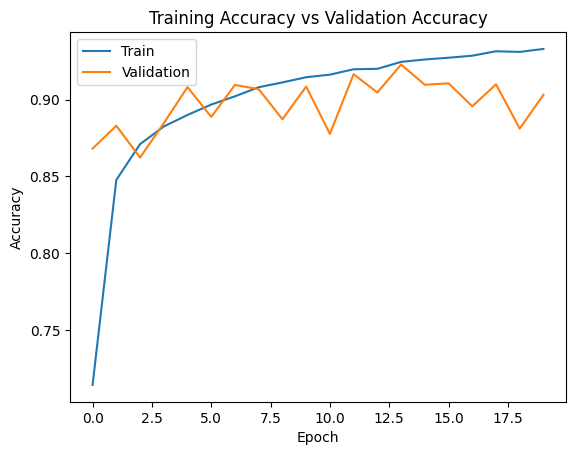

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

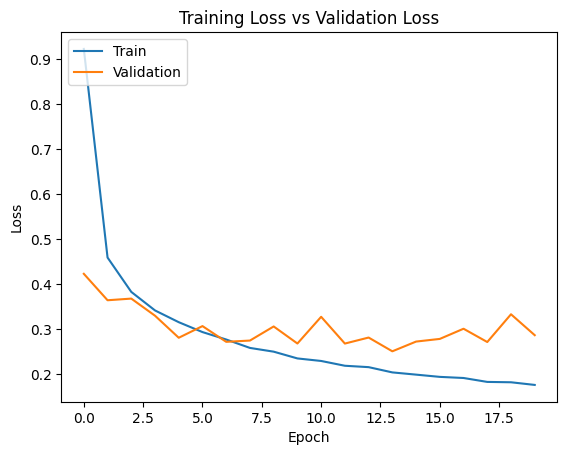

In [21]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [26]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))
    
    # return the list of sorted contours and bounding boxes
    return (cnts, boundingBoxes)

In [27]:
def get_letters(img):
    letters = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]
    # loop over the contours
    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image

#plt.imshow(image)

In [28]:
def get_word(letter):
    word = "".join(letter)
    return word

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1M1DEB0AAH


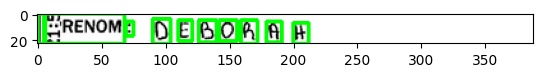

In [30]:
letter,image = get_letters("/kaggle/input/handwriting-recognition/test_v2/test/TEST_0015.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
K1V1IV


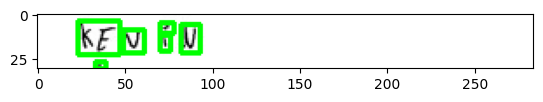

In [33]:
letter,image = get_letters("/kaggle/input/handwriting-recognition/test_v2/test/TEST_0001.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
VALENTJNF


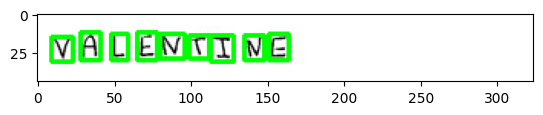

In [35]:
letter,image = get_letters("/kaggle/input/handwriting-recognition/test_v2/test/TEST_0007.jpg")
word = get_word(letter)
print(word)
plt.imshow(image)